<a href="https://www.kaggle.com/code/vyom71/lstm-stock-market-prediction?scriptVersionId=167331882" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
import pandas as pd
import tiingo
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install tiingo

# IMPORITNG DATA - API ( tiingo)

In [4]:
key = 'ad839210799c25414a42e87ba39e7259c117a618'
tiingo_client = tiingo.TiingoClient({'session': True, 'api_key': key})

In [5]:
start_date = '2009-01-01'
end_date = '2024-02-25'
prices = tiingo_client.get_dataframe('NVDA', startDate=start_date, endDate=end_date)
df = pd.DataFrame(prices)

In [6]:
df.to_csv('NVDA.csv')

In [7]:
df1 = df.reset_index()['close']

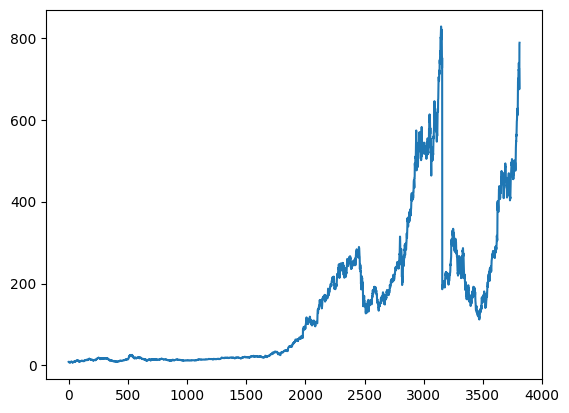

In [8]:
plt.plot(df1)

LSTM ARE SCALE SENSITIVE OF DATA SO NORMALIZE DATA

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
df1.shape

(3811, 1)

# DATA SPLITING

In [10]:
training_size = int(len(df1) * 0.65)

test_size = len(df1) - training_size

train_data= df1[0:training_size,:]

test_data = df1[training_size:len(df1),:1]

In [12]:
import numpy 

In [13]:
# convert an array of values into dataset matrix

def create_dataset(dataset, time_step = 1):
    dataX , dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a) # target 
        dataY.append(dataset[i+time_step,0])
    return  numpy.array(dataX), numpy.array(dataY)



In [14]:
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [25]:
# always we have to give input to LSTM with three parameters

In [15]:
# reshape input to be [samples, time_stemp, feature ]

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)


X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# STACK LSTM MODEL CREATION

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2024-03-16 15:45:44.158663: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 15:45:44.158801: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 15:45:44.341470: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')          

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - loss: 0.0038 - val_loss: 0.0058
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - loss: 8.6338e-05 - val_loss: 0.0051
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 7.3251e-05 - val_loss: 0.0072
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - loss: 5.6688e-05 - val_loss: 0.0061
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - loss: 7.6866e-05 - val_loss: 0.0091
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 7.0838e-05 - val_loss: 0.0073
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 6.1557e-05 - val_loss: 0.0067
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 5.3813e-05 - val_loss: 0.0081
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - loss: 5.7444e-05 - val_loss: 0.0061
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 6.1960e-05 - val_loss: 0.0073
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 4.4589e-05 - val_loss: 0

In [20]:
# prediction and performance matrix 
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [21]:
# tranform to orignal form 
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [22]:
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

92.89350958009688

In [23]:
math.sqrt(mean_squared_error(y_test,test_predict))

346.8492990963777

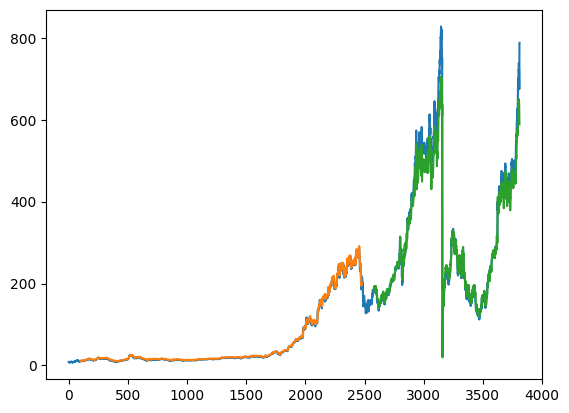

In [24]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [41]:
len(test_data)

1334

In [58]:
x_input=test_data[1234:].reshape(1,-1)
x_input.shape

(1, 100)

In [59]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [60]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<100):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.86563087]
101
1 day input [0.52143823 0.52782279 0.53570602 0.54879193 0.54283382 0.54923056
 0.56151231 0.56320593 0.54512446 0.55284929 0.52656781 0.5053428
 0.5041853  0.49548573 0.51483435 0.52321714 0.50026196 0.48255821
 0.48467827 0.49273208 0.48808987 0.50691458 0.5213042  0.53956843
 0.5486579  0.55114349 0.55868556 0.56326685 0.58014207 0.58361459
 0.5962375  0.58687997 0.59409306 0.59187553 0.60541225 0.59974657
 0.58478428 0.57333106 0.57900893 0.57387935 0.57776614 0.56107368
 0.56101276 0.54572149 0.55858809 0.5456362  0.55895361 0.5700413
 0.55933133 0.57188113 0.57713255 0.58032483 0.58690434 0.60136708
 0.59560391 0.57741279 0.58812277 0.58617328 0.59164402 0.59332545
 0.5946048  0.5946048  0.57810729 0.57080891 0.57603597 0.58942649
 0.62788006 0.63868751 0.65343048 0.65918146 0.65781682 0.67818893
 0.6741803  0.68702253 0.71606984 0.71805588 0.72072423 0.73886662
 0.74197361 0.73483362 0.75230587 0.75607082 0.74087702 0.75915344
 0.79732677 0.83597529 0.82246293 0

In [61]:
day_new=np.arange(1,101)
day_pred=np.arange(101,201)

In [62]:
len(df1)

3811

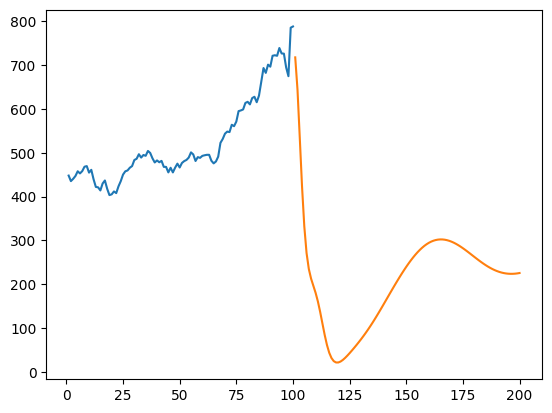

In [63]:
plt.plot(day_new,scaler.inverse_transform(df1[3711:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

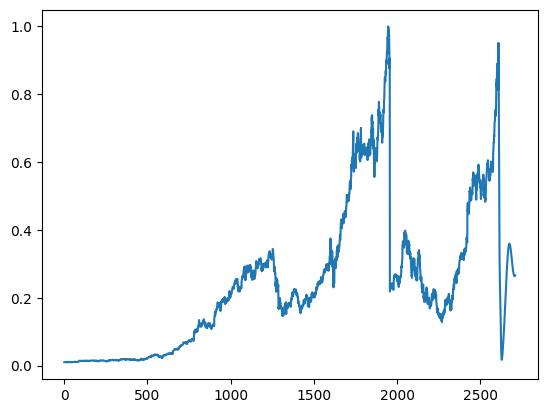

In [64]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [65]:
df3=scaler.inverse_transform(df3).tolist()

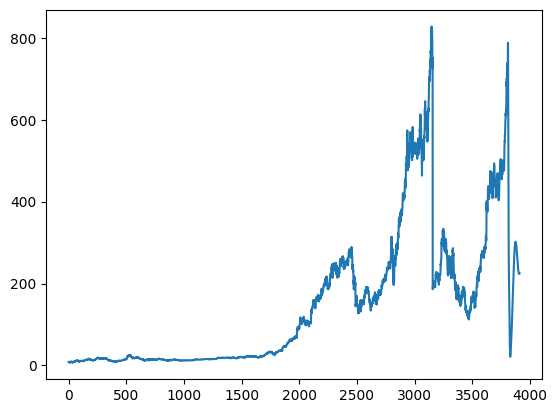

In [66]:
plt.plot(df3)